# Python Assignment 1

Name: Chai Pin Zheng 

Admission No: P2026338

Teacher: Wilson Qiu ZiXuan

Class: EL/EP0302/FT/02

## Introduction
In this report, I'll be using 3 government datasets to analyze Singapore Health Care system which is
- hospital-admissions-and-public-sector-outpatient-attendances-annual.csv https://data.gov.sg/dataset/hospital-admissions-and-public-sector-outpatient-attendances-annual
- health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private.csv https://data.gov.sg/dataset/health-facilities 
- number-of-doctors https://data.gov.sg/dataset/number-of-doctors

But, before I began working on these datasets, I wanted to learn more about how Singapore has dealt with the rising number of hospital admissions. Following that, there was a lot of media coverage about Singapore increasing its healthcare spending. This is due to Singapore's ageing population, which places a significant strain on both the facilities and beds available, as well as the need for skilled talent such as doctors. (CNA. 2021.)

![black-divider](https://cna-sg-res.cloudinary.com/image/upload/q_auto,f_auto/image/12179334/16x9/670/377/ab5288485829896106bd3ae734fdc274/Ca/healthcare-in-singapore-1---2673662.png)

As such, the question of can Singapore copes with the number of admissions was raised. Moreover, are the rate of admissions manageable for our current infrastructure. If not, where should we direct the funding? After all, we only have a limited amount of resources. In addition, are there enough doctors to handle the influxes, as we do not want to overstretch their given capacity as it may lead to medical accidents?

As a result, in this journal report, we will investigate the datasets to comprehend the significance of the problem. It will help us by providing key insights, a way to visualize the problem, and also suggesting potential solutions.

## Import relevant Libraries

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, Markdown, Latex

## Reading the Data

---

As all of the data files are in `.csv` format, I will import the data using the 'Numpy.genfromtxt' method.

In [ ]:
hospital_admissions = np.genfromtxt("data/hospital-admissions-and-public-sector-outpatient-attendances-annual.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U32', int))

facilities_and_bed = np.genfromtxt("data/health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U21', 'U21', 'U14', int, int))

number_of_doctors = np.genfromtxt("data/number-of-doctors.csv",
                    delimiter=",",
                    names=True, dtype=(int, 'U22', 'U14', int))

## Cleaning the data 

---

We will drop any rows that have fields that contain `empty` values. This is to ensure that when plotting, there will be no major issues

In [ ]:
hospital_admissions_cleaned = hospital_admissions[hospital_admissions['value'] != -1]
facilities_and_bed_cleaned = facilities_and_bed
number_of_doctors_cleaned = number_of_doctors[number_of_doctors['count'] != -1]

## Text-base data analysis

---

- Analysis of "hospital-admissions-and-public-sector-outpatient-attendances-annual.csv"

In [ ]:
# retriving columns
column = hospital_admissions.dtype.names
hospital_admissions_years = hospital_admissions["year"]
year = np.unique(hospital_admissions_years)
Markdown(f'''
Within this .csv:
---  
---
- There are exactly {len(hospital_admissions)} rows, {len(hospital_admissions[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- However, there are {len(hospital_admissions[hospital_admissions['value'] == -1])} rows of **empty data**.
- When **filtered**, there are now only {len(hospital_admissions_cleaned)} rows left.


***Within the {len(column)} columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| {column[0]} | {type(hospital_admissions[column[0]][0])} |
| {column[1]} | {type(hospital_admissions[column[1]][0])} |
| {column[2]} | {type(hospital_admissions[column[2]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(hospital_admissions_cleaned[column[0]]))} | {hospital_admissions_cleaned[column[0]].std()} | {hospital_admissions_cleaned[column[0]].mean()} | {hospital_admissions_cleaned[column[0]].min()} | {np.median(hospital_admissions_cleaned[column[0]])} | {hospital_admissions_cleaned[column[0]].max()} |
| {column[2]} | {float(len(hospital_admissions_cleaned[column[2]]))} | {hospital_admissions_cleaned[column[2]].std()} | {hospital_admissions_cleaned[column[2]].mean()} | {hospital_admissions_cleaned[column[2]].min()} | {np.median(hospital_admissions_cleaned[column[2]])} | {hospital_admissions_cleaned[column[2]].max()} |
''')


Within this .csv:
---  
---
- There are exactly 296 rows, 3 columns in this dataset.
- There are 37 years of data captured from **1984** to **2020**
- However, there are 70 rows of **empty data**.
- When **filtered**, there are now only 226 rows left.


***Within the 3 columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| year | <class 'numpy.int32'> |
| level_1 | <class 'numpy.str_'> |
| value | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 226.0 | 10.61528770927096 | 2003.8982300884957 | 1984 | 2006.0 | 2020 |
| value | 226.0 | 1586227.0903979384 | 1452319.9336283186 | 6229 | 891134.0 | 6691295 |


---

- Analysis of "health-facilities-and-beds-in-inpatient-facilities-public-not-for-profit-private"

In [ ]:
# retriving columns
column = facilities_and_bed.dtype.names

# Extracts out all the years
facilities_and_bed_years = facilities_and_bed["year"]
year = np.unique(facilities_and_bed_years)
Markdown(f'''
***Within this .csv:***
---  
---

- There are exactly {len(facilities_and_bed)} rows, {len(facilities_and_bed[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- There are {len(facilities_and_bed[facilities_and_bed['no_beds'] == -1]) + len(facilities_and_bed[facilities_and_bed['no_of_facilities'] == -1])} rows of **empty data**.

***Within the {len(column)} columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| **{column[0]}** | {type(facilities_and_bed[column[0]][0])} |
| **{column[1]}** | {type(facilities_and_bed[column[1]][0])} |
| **{column[2]}** | {type(facilities_and_bed[column[2]][0])} |
| **{column[3]}** | {type(facilities_and_bed[column[3]][0])} |
| **{column[4]}** | {type(facilities_and_bed[column[4]][0])} |
| **{column[5]}** | {type(facilities_and_bed[column[5]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(facilities_and_bed[column[0]]))} | {facilities_and_bed[column[0]].std()} | {facilities_and_bed[column[0]].mean()}| {facilities_and_bed[column[0]].min()} | {np.median(facilities_and_bed[column[0]])} | {facilities_and_bed[column[0]].max()} |
| {column[4]} | {float(len(facilities_and_bed[column[4]]))} | {facilities_and_bed[column[4]].std()} | {facilities_and_bed[column[4]].mean()}| {facilities_and_bed[column[4]].min()} | {np.median(facilities_and_bed[column[4]])} | {facilities_and_bed[column[4]].max()} |
| {column[5]} | {float(len(facilities_and_bed[column[5]]))} | {facilities_and_bed[column[5]].std()} | {facilities_and_bed[column[5]].mean()}| {facilities_and_bed[column[5]].min()} | {np.median(facilities_and_bed[column[5]])} | {facilities_and_bed[column[5]].max()} |

''')


***Within this .csv:***
---  
---

- There are exactly 180 rows, 6 columns in this dataset.
- There are 12 years of data captured from **2009** to **2020**
- There are 0 rows of **empty data**.

***Within the 6 columns, the datatypes are:***
---
---  
  
| Column | Date Type |
| --- | --- |
| **year** | <class 'numpy.int32'> |
| **institution_type** | <class 'numpy.str_'> |
| **facility_type_a** | <class 'numpy.str_'> |
| **public_private** | <class 'numpy.str_'> |
| **no_of_facilities** | <class 'numpy.int32'> |
| **no_beds** | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 180.0 | 3.452052529534663 | 2014.5| 2009 | 2014.5 | 2020 |
| no_of_facilities | 180.0 | 9.813879060912775 | 6.433333333333334| 0 | 1.0 | 34 |
| no_beds | 180.0 | 2468.2497446208695 | 1696.338888888889| 0 | 286.5 | 9610 |



---

- Analysis of "health-facilities-and-beds-in-inpatient-facilities.csv"

In [ ]:
# retriving columns
column = number_of_doctors.dtype.names
# Extracts out all the years
number_of_doctors_years = number_of_doctors["year"]
year = np.unique(number_of_doctors_years)
Markdown(f'''
***Within this .csv:***
---
---

- There are exactly {len(number_of_doctors)} rows, {len(number_of_doctors[0])} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**
- There are {len(number_of_doctors[number_of_doctors['count'] == -1])} rows of **empty data**.

***Within the {len(column)} columns, the datatypes are:***
---
---
  
| Column | Date Type |
| --- | --- |
| **{column[0]}** | {type(number_of_doctors[column[0]][0])} |
| **{column[1]}** | {type(number_of_doctors[column[1]][0])} |
| **{column[2]}** | {type(number_of_doctors[column[2]][0])} |
| **{column[3]}** | {type(number_of_doctors[column[3]][0])} |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| {column[0]} | {float(len(number_of_doctors_cleaned[column[0]]))} | {number_of_doctors_cleaned[column[0]].std()} | {number_of_doctors_cleaned[column[0]].mean()} | {number_of_doctors_cleaned[column[0]].min()} | {np.median(number_of_doctors_cleaned[column[0]])} | {number_of_doctors_cleaned[column[0]].max()} |
| {column[3]} | {float(len(number_of_doctors_cleaned[column[3]]))} | {number_of_doctors_cleaned[column[3]].std()} | {number_of_doctors_cleaned[column[3]].mean()} | {number_of_doctors_cleaned[column[3]].min()} | {np.median(number_of_doctors_cleaned[column[3]])} | {number_of_doctors_cleaned[column[3]].max()} |
''')


***Within this .csv:***
---
---

- There are exactly 78 rows, 4 columns in this dataset.
- There are 14 years of data captured from **2006** to **2019**
- There are 0 rows of **empty data**.

***Within the 4 columns, the datatypes are:***
---
---
  
| Column | Date Type |
| --- | --- |
| **year** | <class 'numpy.int32'> |
| **sector** | <class 'numpy.str_'> |
| **specialist_nonspecialist** | <class 'numpy.str_'> |
| **count** | <class 'numpy.int32'> |


***Descriptive Statistics (cleaned):***
---
---

| Column | count | std | mean | min | median | max |
| --- | --- | --- | --- | --- | --- | --- |
| year | 78.0 | 3.807692307692307 | 2012.9615384615386 | 2006 | 2013.0 | 2019 |
| count | 78.0 | 1458.2602394192668 | 1910.2948717948718 | 193 | 1789.0 | 5166 |


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Plotting the Data

---

All of the data will be plotted using matplotlib for visualisation

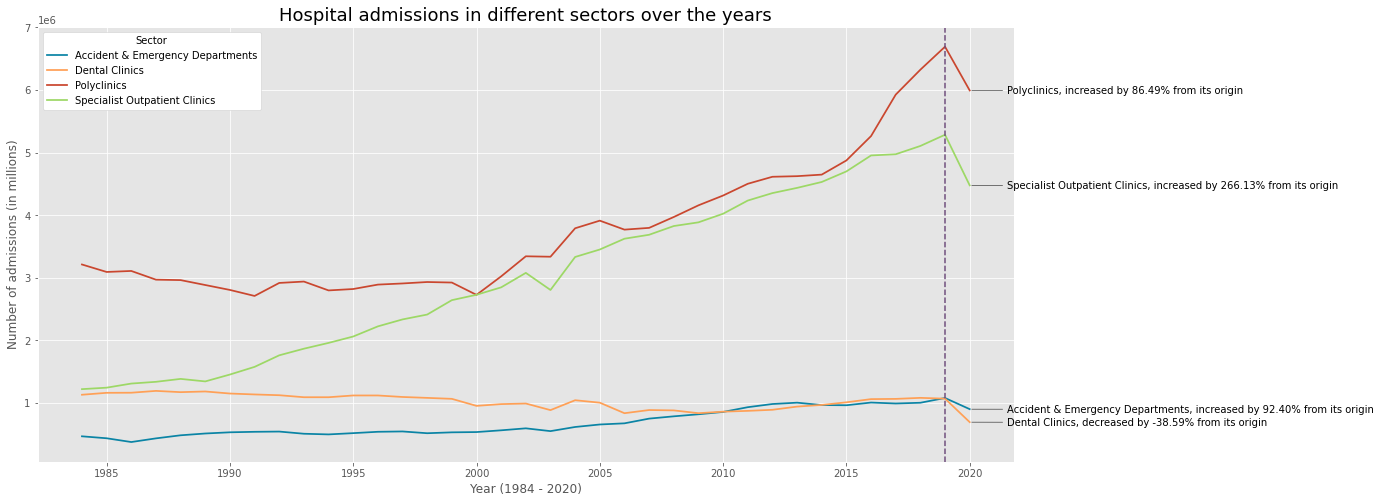

In [ ]:
# Line chart Y
linechart_Accident_and_Emergency_Departments = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Accident & Emergency Departments']['value']
linechart_Acute_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Acute Hospitals Admissions']['value'] #
linechart_Community_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Community Hospitals Admissions']['value'] #
linechart_Day_Surgeries = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Day Surgeries']['value']
linechart_Dental_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Dental Clinics']['value']
linechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value']
linechart_Psychiatric_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Psychiatric Hospitals Admissions']['value'] #
linechart_Specialist_Outpatient_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Specialist Outpatient Clinics']['value']

# Line chart X
x = np.unique(hospital_admissions_cleaned['year'])

# Relative Percentage from origin
percentage_ANE = ((linechart_Accident_and_Emergency_Departments[-1] - linechart_Accident_and_Emergency_Departments[0]) / linechart_Accident_and_Emergency_Departments[0]) * 100
percentage_DC = ((linechart_Dental_Clinics[-1] - linechart_Dental_Clinics[0]) / linechart_Dental_Clinics[0]) * 100
percentage_PC = ((linechart_Polyclinics[-1] - linechart_Polyclinics[0]) / linechart_Polyclinics[0]) * 100
percentage_SC = ((linechart_Specialist_Outpatient_Clinics[-1] - linechart_Specialist_Outpatient_Clinics[0]) / linechart_Specialist_Outpatient_Clinics[0]) * 100

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8))
    # fig.set_facecolor("lightblue")

    # Figure 1
    ax.plot(x, linechart_Accident_and_Emergency_Departments ,color='#0B84A5', linewidth=1.75, label='Accident & Emergency Departments')
    ax.annotate(f'Accident & Emergency Departments, increased by {percentage_ANE:.2f}% from its origin', xy=(x[-1], 903361), xytext=(x[-1] + 1.5, 903361 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 2
    ax.plot(x, linechart_Dental_Clinics ,color='#FFA056', linewidth=1.75, label='Dental Clinics')
    ax.annotate(f'Dental Clinics, decreased by {percentage_DC:.2f}% from its origin', xy=(x[-1], 695921), xytext=(x[-1] + 1.5, 695921 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 3
    ax.plot(x, linechart_Polyclinics ,color='#CA472F', linewidth=1.75, label='Polyclinics')
    ax.annotate(f'Polyclinics, increased by {percentage_PC:.2f}% from its origin', xy=(x[-1], 5992676), xytext=(x[-1] + 1.5, 5992676 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")
    # Figure 4
    ax.plot(x, linechart_Specialist_Outpatient_Clinics ,color='#9DD866', linewidth=1.75, label='Specialist Outpatient Clinics')
    ax.annotate(f'Specialist Outpatient Clinics, increased by {percentage_SC:.2f}% from its origin', xy=(x[-1], 4477097), xytext=(x[-1] + 1.5, 4477097 - 50000), arrowprops=dict(color ='black',arrowstyle="-"),xycoords="data")

    # Highlighting anomalies
    ax.axvline(2019, 0, 1, linestyle="--", color="#6F4E7C")

    # displaying the figure
    ax.set_title("Hospital admissions in different sectors over the year", fontsize=18)
    ax.set_ylabel("Number of admissions (in millions)")
    ax.set_xlabel("Year (1984 - 2020)")
    ax.legend(facecolor='white', framealpha=1, title="Sector")
    plt.show()

### Insights
- Every sector has experienced a positive increase in the number of admissions, except the dental clinic sector, which was the only sector to experience a drop in the number of admissions.
- The sector that experienced the greatest growth is the specialist outpatient clinic sector, which saw an increase of over 266.13%.
- The top 3 sectors that gained the most number of patients are Specialist Outpatient Clinics(266.13%), Accident & Emergency Departments(92.40%) and Polyclinics (86.49%)
- However, in 2019, every sector experienced a drop in admissions throughout all sectors. This is due to the covid-19 pandemic. As such, many people avoid and reduce their visits to the hospital. In addition, many non-critical procedures were also deferred. As a result of this confluence of factors, the number of attendees decreased.

^ From this, we can see that the fact that there are greater patient admissions are true and have been ever growing since 1984!

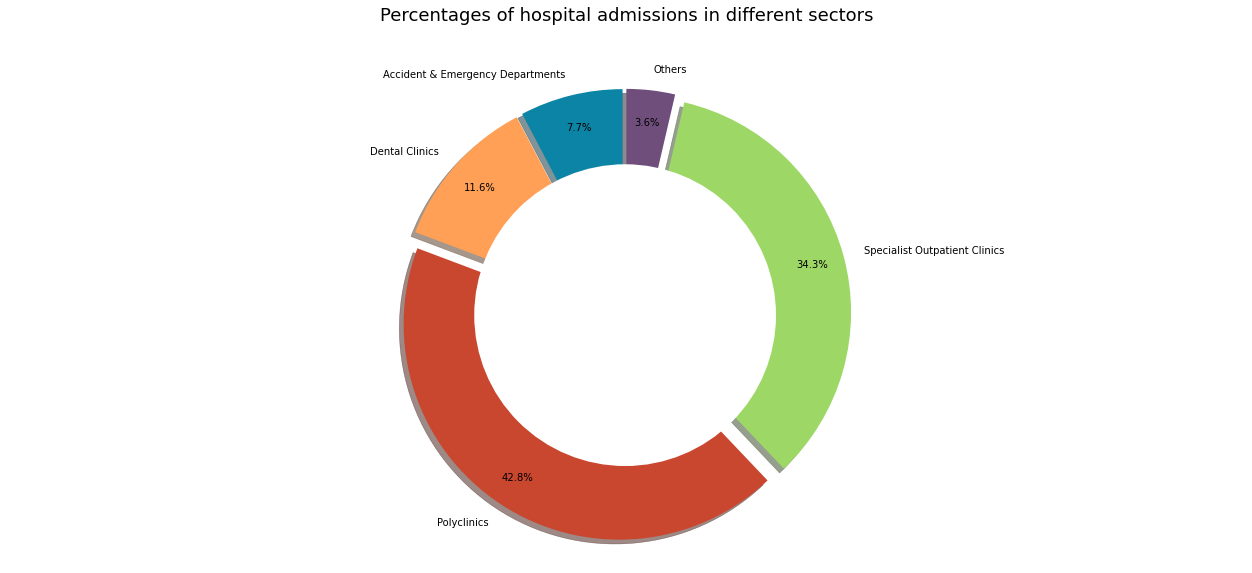

In [ ]:
# Pie chart Y
piechart_Accident_and_Emergency_Departments = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Accident & Emergency Departments']['value'].sum()
piechart_Acute_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Acute Hospitals Admissions']['value'].sum()
piechart_Community_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Community Hospitals Admissions']['value'].sum()
piechart_Day_Surgeries = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Day Surgeries']['value'].sum()
piechart_Dental_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Dental Clinics']['value'].sum()
piechart_Polyclinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Polyclinics']['value'].sum()
piechart_Psychiatric_Hospitals_Admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Psychiatric Hospitals Admissions']['value'].sum()
piechart_Specialist_Outpatient_Clinics = hospital_admissions_cleaned[hospital_admissions_cleaned['level_1'] == 'Specialist Outpatient Clinics']['value'].sum()

# The initial plan was to represent each sector in the piechart. However, because the figures for day surgeries, community hospital admissions, acute hospital admissions, and psychiatric hospital values were too small, it wasn't representive at all. Hence, I decided to combine them instead.
piechart_data = [piechart_Accident_and_Emergency_Departments, piechart_Dental_Clinics, piechart_Polyclinics, piechart_Specialist_Outpatient_Clinics, (piechart_Day_Surgeries + piechart_Community_Hospitals_Admissions + piechart_Acute_Hospitals_Admissions + piechart_Psychiatric_Hospitals_Admissions)]

# configuration to the pie chart
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ["#0B84A5", "#FFA056", "#CA472F", "#9DD866", "#6F4E7C"]
labels = ['Accident & Emergency Departments', 'Dental Clinics', 'Polyclinics', 'Specialist Outpatient Clinics', 'Others']

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize = (17.5, 8), tight_layout = True)

    #Figure 1
    ax.pie(piechart_data, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors = colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Percentages of hospital admissions in different sectors", y = 1.08, fontsize = 18)
    plt.show()
    
    # Personal journal
    # - This was initially the plan, however, due to figures such as day surgeries, community hospital admissions, acute hospital admissions values being so small, I decided to merge the data of those instead

### Insights
- From the donut chart, the polyclinic sector has received the most number of admissions at 42.8%.
- On the other hand, others which includes day surgeries, community hospitals, acute hospitals, and psychiatric hospitals sectors, account for only 3.7% of all patients admissions. Hence, recieving the fewest admissions.
- The top 3 sectors are Polyclincs (42.8%), Speciallist Outpatient Clinics (34.3%) and dental clinics (11.6%).

^ As such, from this, we can see the number which sectors recieve the greatest number of admissions, allowing us to understand that we should allocate greater fundings into polyclinics. Moreover, we are able to conclude that yes! The number of admissions are actually rising rapidly!

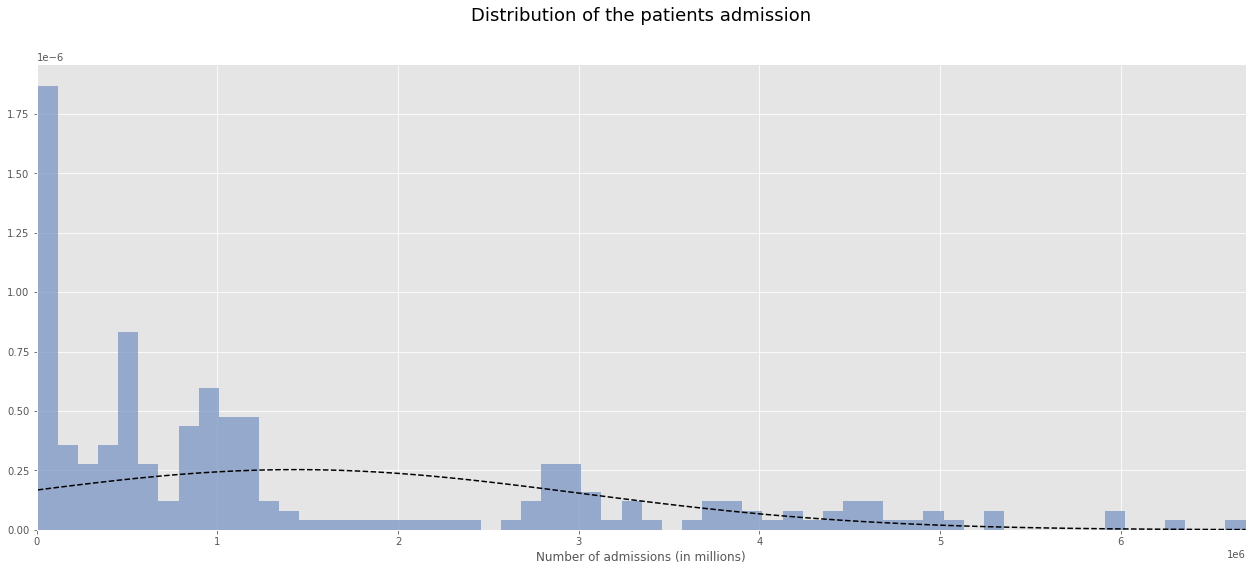

In [ ]:
# Histogram
histogram_data = hospital_admissions_cleaned['value']

# Configurations
mu = 1434276.725663717  # mean of distribution
sigma = 1574253.3692067433  # standard deviation of distribution
num_bins = 60

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)
    # Plotting the histogram
    n, bins, patches = ax.hist(histogram_data, num_bins, density=True, facecolor='#7995C4', alpha=0.75, linewidth =1)

    # Plotting the trendline
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', color="black")

    # Plotting
    plt.title("Distribution of the patients admission", y=1.08, fontsize=18)
    ax.set_xlabel("Number of admissions (in millions)")
    ax.set_xlim(0,histogram_data.max())
    plt.show()

# https://matplotlib.org/stable/gallery/statistics/histogram_features.html

### Insights
- The histogram shows a one tail positive skewed distribution towards the right.
- values are concentrated to the lower values, between 0 to 1 million number of admissions (left side)

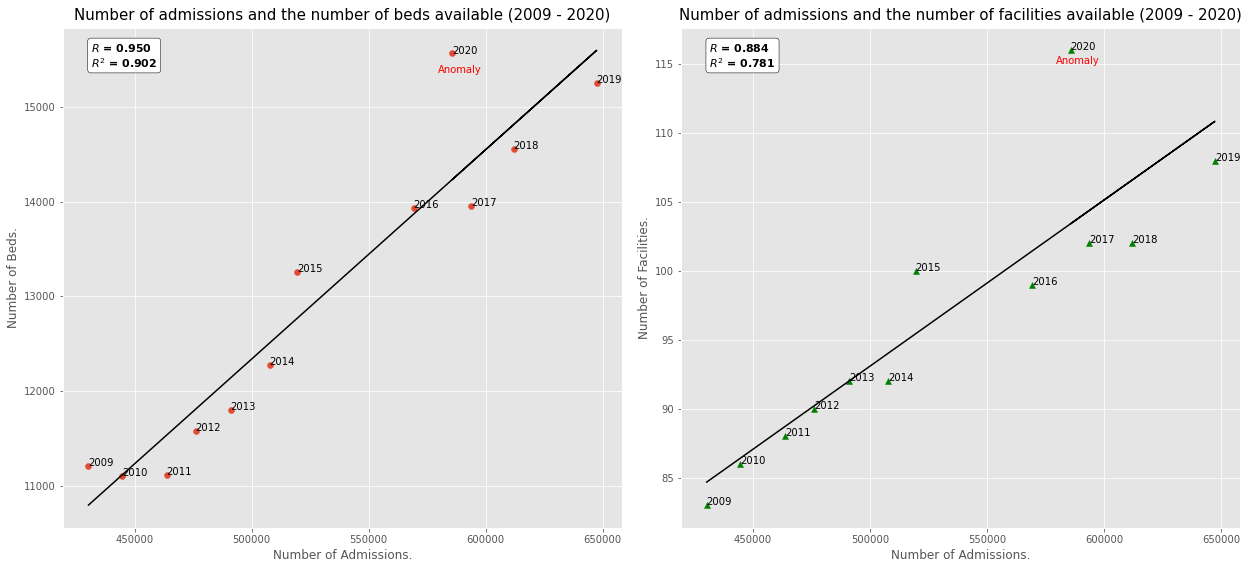

In [ ]:
import math
# Assignment of variables - Y Axis
# This variables are mainly for the number of admissions, from hospital_admissions_cleaned
number_of_admissions = hospital_admissions_cleaned[hospital_admissions_cleaned['year'] >= 2009]
number_of_admissions = number_of_admissions[(number_of_admissions['level_1'] == "Acute Hospitals Admissions") | (number_of_admissions['level_1'] =="Psychiatric Hospitals Admissions") | (number_of_admissions['level_1'] =="Community Hospitals Admissions")]
# This variables are mainly for the number of beds, from facilities_and_bed_cleaned
number_of_beds = facilities_and_bed_cleaned[(facilities_and_bed_cleaned['facility_type_a'] == "Acute") | (facilities_and_bed_cleaned['facility_type_a'] == "Psychiatric Hospitals") | (facilities_and_bed_cleaned['facility_type_a'] == "Community Hospitals")]
number_of_facilities = []
unique_admission_years = np.unique(facilities_and_bed_cleaned['year'])
# Lists to store the x and y value
container_of_beds = []
container_of_admissions = []
container_of_facilities = []

for i in range(len(unique_admission_years)):
    container_of_beds.append(number_of_beds[number_of_beds['year'] == unique_admission_years[i]]['no_beds'].sum())
    container_of_facilities.append(facilities_and_bed_cleaned[facilities_and_bed_cleaned['year'] == unique_admission_years[i]]['no_of_facilities'].sum())
    container_of_admissions.append(number_of_admissions[number_of_admissions['year'] == unique_admission_years[i]]["value"].sum())

# modifying the array to be a numpy array
container_of_beds = np.array(container_of_beds)
container_of_admissions = np.array(container_of_admissions)
box = {'facecolor': 'white',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }

# Polynomial Regression
def PolyRegress(x_values, y_values):
    my_fitting = np.polyfit(x_values, y_values, 1, full=True)
    coeff = my_fitting[0]

    ### Residual or Sum of Square Error (SSE)
    SSE = my_fitting[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff = y_values - y_values.mean()
    square_diff = diff ** 2
    SST = square_diff.sum()

    ###  Now getting the coefficient of determination (R2)
    R2 = 1 - SSE/SST
    return([math.sqrt(R2),R2])

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17.5, 8), tight_layout=True)

    # Subplot 1
    ax1.scatter(container_of_admissions, container_of_beds)
    [R1, R2] = PolyRegress(container_of_admissions, container_of_beds)
    ax1.set_ylabel("Number of Beds.")
    ax1.set_xlabel("Number of Admissions.")
    ax1.set_title("Number of admissions and the number of beds available (2009 - 2020)", y=1.005, fontsize=15)
    ax1.text(0.05, 0.92, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax1.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 11}, bbox= box)

    for i, txt in enumerate(unique_admission_years):
        ax1.annotate(txt, (container_of_admissions[i], container_of_beds[i]))

    ax1.text(container_of_admissions[-1] - 6300,  container_of_beds[-1] - 200, "Anomaly", color="red")
    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(container_of_admissions, container_of_beds, 1)
    p = np.poly1d(z)
    ax1.plot(container_of_admissions,p(container_of_admissions),  color="black")

    # Subplot 2
    ax2.scatter(container_of_admissions, container_of_facilities, marker="^", color="green")
    [R1, R2] = PolyRegress(container_of_admissions, np.array(container_of_facilities))
    ax2.set_ylabel("Number of Facilities.")
    ax2.set_xlabel("Number of Admissions.")
    ax2.set_title("Number of admissions and the number of facilities available (2009 - 2020)", y=1.005, fontsize=15)
    plt.text(0.05, 0.92, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax2.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 11}, bbox= box)

    for i, txt in enumerate(unique_admission_years):
        ax2.annotate(txt, (container_of_admissions[i], container_of_facilities[i]))

    ax2.text(container_of_admissions[-1] - 6300, container_of_facilities[-1] - 1, "Anomaly", color="red")
    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(container_of_admissions, container_of_facilities, 1)
    p = np.poly1d(z)
    ax2.plot(container_of_admissions,p(container_of_admissions), color="black")

# Personal journal before transfering to the powerpoint
# To be reflective of the actual changes, I only have targetted sectors that are similar in both data sheet. As such i only can target acute hospital admissions, Psychiatric Hospitals Admissions and Community Hospitals Admissions as they both have these similar sectors

### Insights
- As the number of patients increases, the number of beds and facilities also increases.
- As such, this suggests that to accomodate the rising number of admissions, a greater amount of beds and facilties was also needed to accommodate patients.
- There was more beds and facilities per patient admission in 2020, meaning there was a surplus of beds and facilities. This could be due to the covid-19 pandemic, where many people avoided seeking treatment due to their fears.

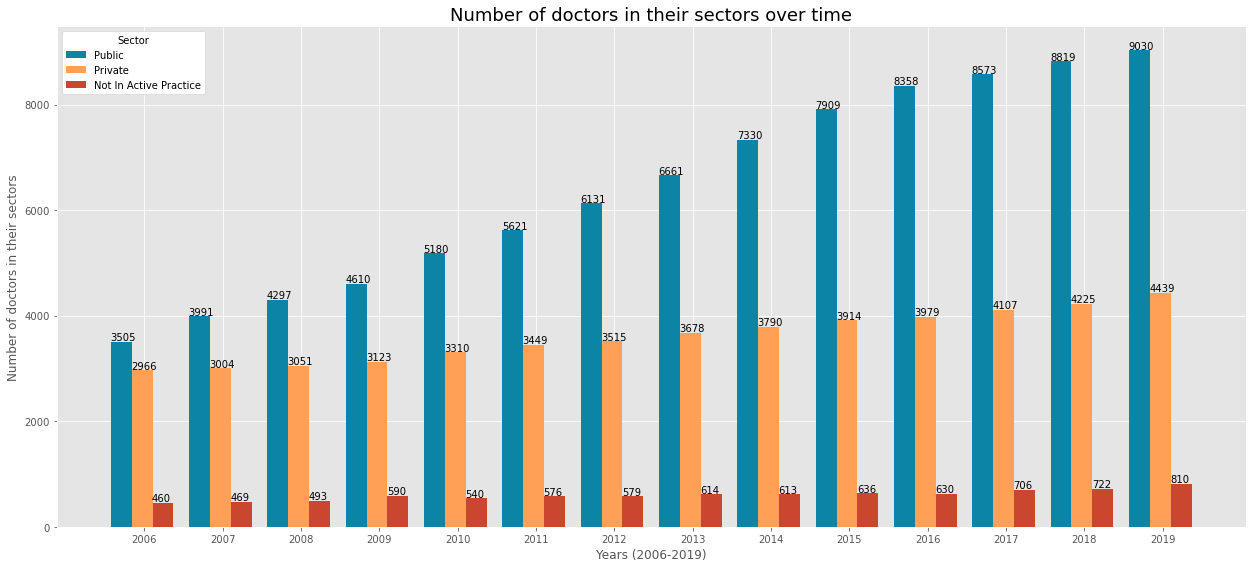

In [ ]:
# For the Y axis
year = 1984
selective_years = np.unique(number_of_doctors['year'])
column_alternator = ['Public', 'Private', 'Not In Active Practice']

big_container = [[], [], []]
for i in range(len(column_alternator)):
    # Extracts all the value for each sector first
    for n in range(len(selective_years)):
        big_container[i].append(number_of_doctors[(number_of_doctors['sector'] == column_alternator[i]) & ((number_of_doctors['year'] == selective_years[n]))]['count'].sum())

# Configuration
bar_width = 0.4
width = 0.8 / len(big_container)
colors = ["#0B84A5", "#FFA056", "#CA472F"]
labels = selective_years

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)

    # Figures
    Pos = np.array(range(len(big_container[0]))) 
    for i in range(len(big_container)):
        ax.bar(Pos + i * width, big_container[i], width = width, label = column_alternator[i], color = colors[i])
        for k in range(len(big_container[0])):
            ax.annotate(f"{big_container[i][k]}", (Pos[k] - 0.14 + i * width, big_container[i][k] + 26))

    plt.xticks(Pos + bar_width / 1.35, labels)
    #plt.ylim(0, 25000000)

    # Displaying the figure
    plt.title("Number of doctors in their sectors over time", fontsize = 18)
    plt.xlabel("Year (2006-2019)")
    plt.ylabel("Number of doctors in their sectors")
    ax.legend(facecolor = 'white', framealpha = 1, title = "Sector")
    plt.show()

    # Find out how doctors have been facing

### Insights
- From the grouped bar graph, we can see that the number of doctors in the public sector has the greatest increase, from 3505 doctors to 9030 doctors.
- On the other hand, the number of doctors that are not in active practice have the lowest increase, from 460 doctors to 810 doctors. This signifies that due to the great demand of doctors, many doctors are kept in active practise and are unable to retire. As such, this highlights the great strain due to the lack of doctors. As such, this is a terrible news as this could mean that many doctors might retire at the same time due to age. Hence, this can lead to a shortage of doctors which places further strain on doctors that are still in practise

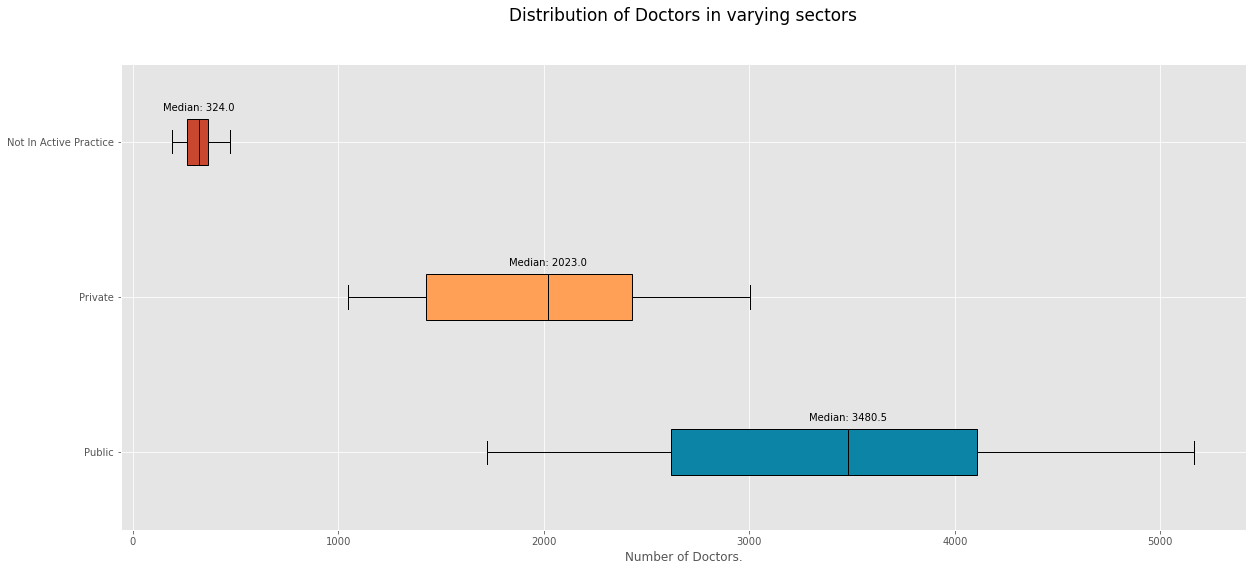

In [ ]:
# Y values
x1 = number_of_doctors[number_of_doctors['sector'] == "Public"]['count']
x2 = number_of_doctors[number_of_doctors['sector'] == "Private"]['count']
x3 = number_of_doctors[number_of_doctors['sector'] == "Not In Active Practice"]['count']
data = [x1,x2,x3]
color = ["#0B84A5", "#FFA056", "#9DD866"]
labels = ["Public", "Private", "Not In Active Practice"]

with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(17.5, 8), tight_layout=True)
    bp = ax.boxplot(data, labels=labels, vert=False, patch_artist = True,)

    # Figure decoration
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color ='black',linewidth = 1)

    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        ax.text(x, y + 0.05, f"Median: {x}", horizontalalignment='center') # draw above, centered

    ax.set_xlabel("Number of Doctors.")
    ax.set_title("Distribution of Doctors in varying sectors", y = 1.08, fontsize = 17)

    plt.show()

In [3]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
public_specialist = [1996, 2165, 2342, 2511, 2829, 3052, 3299, 3523, 3741, 3864]
public_nonspecialist = [3184, 3456, 3789, 4150, 4501, 4857, 5059, 5050, 5078, 5166]
private_specialist = [1151, 1229, 1293, 1351, 1411, 1470, 1485, 1528, 1565, 1682]
private_nonspecialist = [2159, 2220, 2222, 2327, 2379, 2444, 2494, 2579, 2660, 2757]

print("Please choose one of the following")
print("A or a - Number of doctors by category in 2014")
print("B or b - Average of doctors by category in 2010-2015")
print("C or c - lowest three number of doctors by category in 2010-2015")
print("D or d - display highest percentage change")
print("E or e - display line plots")
print("Q or q - Quit")


sel = input("please choose A, B, C, D, E or Q:  ")
if sel.upper == "A":
        print("number of public specialist in 2014 is",public_specialist[4])
        print("number of public non specialist in 2014 is",public_nonspecialist[4])
        print("number of private specialist in 2014 is",private_specialist[4])
        print("number of private non specialist in 2014 is",private_nonspecialist[4])
        
elif sel.upper == "B":
    total_public_specialist = 0
    for i in range (6):
        total_public_specialist = total_public_specialist + public_specialist[i]

    average_public_specialist =total_public_specialist/5
    print("average public specialist:",average_public_specialist)

    total_public_nonspecialist = 0
    for i in range (6):
        total_public_nonspecialist = total_public_nonspecialist + public_nonspecialist[i]
    
    
        
    average_public_nonspecialist = total_public_nonspecialist/5
    print("average public non specialist;",average_public_nonspecialist)

    total_private_specialist = 0
    for i in range (6):
        total_private_specialist = total_private_specialist + private_specialist[i]
        
    average_private_specialist = total_private_specialist/5
    print("average private specialist:",average_private_specialist)

    total_private_nonspecialist = 0
    for i in range (6):
        total_private_nonspecialist = total_private_nonspecialist + private_nonspecialist[i]
        
    average_public_nonspecialist = total_private_nonspecialist/5
    print("average private non specialist:",average_public_nonspecialist)

elif sel == "C" or "c":
    for i in range(3):
        print("three lowest number of public specialist is",sorted(public_specialist)[i])
    for i in range(3):
        print("three lowest number of public non specialist is",sorted(public_nonspecialist)[i])
        
    for i in range(3):
        print("three lowest number of private specialist is",sorted(private_specialist)[i])
        
    for i in range(3):
        print("three lowest number of private non specialist is",sorted(private_nonspecialist)[i])

Please choose one of the following
A or a - Number of doctors by category in 2014
B or b - Average of doctors by category in 2010-2015
C or c - lowest three number of doctors by category in 2010-2015
D or d - display highest percentage change
E or e - display line plots
Q or q - Quit


### Insights
- The median of doctors working in the public sector(government hospitals, such as Tan Tock Seng) is 3480.5 which is greater than the median of the number of doctors working in the private sector 2023.0 (private hospitals, such as Raffles Hospital).
- The boxplot for doctors working in the public sector is quite tall, signifiying that the data is more spread out, thus having a higher variance.

## Conclusion

---

As a result of looking at all of these graphs, we can deduce the following: 
- In Singapore, patient admissions are on the rise throughout all sectors. 
- The number of facilities and beds available to accommodate attendees has also increased. The same can be said for the number of physicians.
- The polyclinic and specialist outpatient sector are expected to have greater admissions from their steep growth.


## Solutions

---

Let's try to come up with some solutions based on the information we've gathered:
- Less funding should be dedicated to sectors such as the dental sector, due to the already dropping admissions. Instead, funds should be directed to polyclinics (those with the highest admission rates) or specialist outpatient clinics (those with the greatest growth).
- More polyclinics can be constructed around neighbourhoods to lessen the number of admissions for each polyclinic. This will not only reduce the workload for polyclinic doctors but will also improve the overall experience.
- The number of doctors being trained could be increased. This allows doctors to tend to their patients better, improving to provide better care. Moreover, this reduces medical malpractices as the number of fatalities through preventable medical errors are reduced.

## Citations


---

- Data.gov.sg. (n.d.). Hospital Admissions And Public Sector Outpatient Attendances, Annual. [online] Available at: https://data.gov.sg/dataset/hospital-admissions-and-public-sector-outpatient-attendances-annual.
- Data.gov.sg. (n.d.). Health Facilities and Beds in Inpatient Facilities. [online] Available at: https://data.gov.sg/dataset/health-facilities.
- Data.gov.sg. (n.d.). Number of Doctors. [online] Available at: https://data.gov.sg/dataset/number-of-doctors [Accessed 10 Jun. 2021].
- CNA. 2021. Healthcare spending on the rise because of higher utilisation, rising manpower costs: Gan Kim Yong. [online] Available at: <https://www.channelnewsasia.com/news/singapore/healthcare-spending-rise-higher-utilisation-manpower-costs-12504664> [Accessed 10 June 2021].